<a href="https://colab.research.google.com/github/ShivamD27/users/blob/main/Copy_of_2_letter_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [116]:
dataset = pd.read_csv("/content/2_letter_recognition.data", sep = ",")

In [117]:
dataset.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [118]:
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
dataset['T']= label_encoder.fit_transform(dataset['T'])

dataset['T'].unique()

array([ 8,  3, 13,  6, 18,  1,  0,  9, 12, 23, 14, 17,  5,  2, 19,  7, 22,
       11, 15,  4, 21, 24, 16, 20, 10, 25])

In [119]:
dataset.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,8,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,3,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,13,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,6,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,18,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [120]:
X = dataset.iloc[:, 1 : 17]
Y = dataset['T']

In [121]:
Y.shape

(19999,)

In [122]:
len(dataset['T'].unique())

26

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [124]:
scaler = StandardScaler()
scaler.fit(X_train)


StandardScaler()

In [125]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [126]:
Y_train.shape

(15999,)

In [127]:
X_train.shape

(15999, 16)

In [137]:
# from tensorflow import keras
# from tensorflow.keras import layers

from tensorflow import keras
from tensorflow.keras import layers

# Create the sequential model
model = keras.Sequential()

# Input layer
model.add(layers.Input(shape=(16,)))  # Assuming 16 features based on dataset description

# Hidden layer
model.add(layers.Dense(128, activation="relu"))

# Output layer
model.add(layers.Dense(26, activation="softmax"))

# Compile the model (specifies optimizer, loss function, metrics)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [138]:
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.05, verbose=1)

Epoch 1/20
475/475 [==============================] - 2s 3ms/step - loss: 1.6874 - accuracy: 0.5721 - val_loss: 1.0914 - val_accuracy: 0.7025
Epoch 2/20
475/475 [==============================] - 1s 2ms/step - loss: 0.8633 - accuracy: 0.7681 - val_loss: 0.8076 - val_accuracy: 0.7825
Epoch 3/20
475/475 [==============================] - 2s 3ms/step - loss: 0.6653 - accuracy: 0.8167 - val_loss: 0.6813 - val_accuracy: 0.8100
Epoch 4/20
475/475 [==============================] - 2s 4ms/step - loss: 0.5570 - accuracy: 0.8460 - val_loss: 0.5895 - val_accuracy: 0.8413
Epoch 5/20
475/475 [==============================] - 1s 3ms/step - loss: 0.4829 - accuracy: 0.8672 - val_loss: 0.5362 - val_accuracy: 0.8562
Epoch 6/20
475/475 [==============================] - 1s 3ms/step - loss: 0.4308 - accuracy: 0.8799 - val_loss: 0.4916 - val_accuracy: 0.8587
Epoch 7/20
475/475 [==============================] - 1s 3ms/step - loss: 0.3884 - accuracy: 0.8929 - val_loss: 0.4500 - val_accuracy: 0.8725
Epoch 

In [139]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Get the last element (corresponding to the final epoch)
final_train_acc = train_acc[-1]
final_val_acc = val_acc[-1]

print("Final Training Accuracy:", final_train_acc)
print("Final Validation Accuracy:", final_val_acc)

Final Training Accuracy: 0.952562689781189
Final Validation Accuracy: 0.918749988079071


In [140]:
accuracy = model.evaluate(X_test, Y_test)

125/125 [==============================] - 0s 2ms/step - loss: 0.1970 - accuracy: 0.9402


In [141]:
print(accuracy)

[0.19697682559490204, 0.9402499794960022]


In [142]:
import numpy as np

In [143]:
from sklearn.metrics import confusion_matrix
y_pred = np.argmax(model.predict(X_test), axis=1)
cm = confusion_matrix(Y_test, y_pred)

print("Confusion Matrix on Test Data:\n", cm)


125/125 [==============================] - 0s 2ms/step
Confusion Matrix on Test Data:
 [[168   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
    1   0   0   0   0   0   0   0]
 [  0 134   0   0   0   0   0   0   1   0   1   0   0   1   0   0   0   6
    0   0   0   0   0   1   0   0]
 [  0   0 154   0   0   0   3   1   0   0   0   0   0   0   3   0   0   0
    0   0   0   0   0   0   0   0]
 [  0   2   0 163   0   0   0   1   0   0   0   0   3   2   0   0   1   2
    0   0   0   0   0   0   0   0]
 [  0   0   4   0 134   0   2   0   0   0   0   2   0   0   0   0   0   0
    2   0   0   0   0   0   0   4]
 [  0   0   0   1   2 129   0   1   1   0   0   0   0   0   0   0   0   0
    0   3   0   0   0   0   0   0]
 [  0   2   1   1   2   0 128   0   0   0   0   1   1   0   0   0   4   1
    0   0   0   0   0   0   0   0]
 [  0   5   0   3   0   0   0 111   0   0   6   0   1   0   0   1   3   6
    0   0   1   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0 141   7

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns


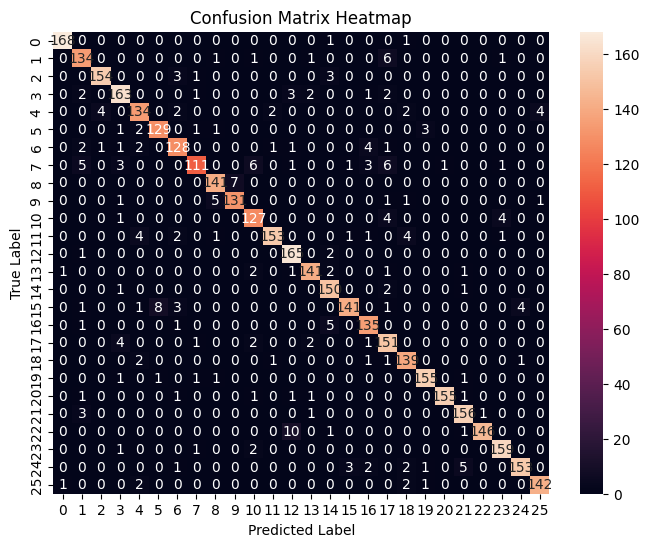

In [145]:
# Create a heatmap with annotations (showing counts in each cell)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d')  # 'd' formats entries as integers

# Set labels for axes
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Set title
plt.title("Confusion Matrix Heatmap")

# Show the plot
plt.show()
